In [12]:
# Title: Analyze Dataset for Delay Causes using Spark (Multiple Files)

# Goal: Create a Google Colab notebook to load multiple dataset files,
# process them using Apache Spark, and identify the main causes of delay,
# along with other relevant delay patterns.

# Steps:

# 1. Setup:
# Install necessary libraries (findspark, pyspark).
!pip install findspark pyspark


In [13]:
# Initialize a Spark session.
import findspark
findspark.init()

# IMPORTANT: Ensure this cell with imports is run before any other cells that use these functions.
from pyspark.sql import SparkSession
# Import necessary functions from pyspark.sql.functions
from pyspark.sql.functions import sum, col, desc, coalesce, lit, count, avg, hour, dayofweek, when, month, substring, lpad # Ensure necessary functions are imported
import matplotlib.pyplot as plt
import pandas as pd
import os # Import os module to list files
from functools import reduce # Import reduce for summing columns - This import is essential for the reduce function.
                              # If you encounter a NameError for 'reduce', please ensure this cell is executed first.
from pyspark import SparkContext # Import SparkContext
# SparkContextState has been removed in newer pyspark versions.
# You likely don't need this import as SparkContext is already imported.
#from pyspark.context import SparkContextState # Import SparkContextState enumeration

In [14]:
# Create a SparkSession
# Check if a SparkSession already exists before creating a new one
spark = SparkSession.builder \
    .appName("FlightDelayAnalysisMultipleFiles") \
    .getOrCreate()

print("Spark session created successfully!")

# 2. Data Loading:
# Load the dataset from the specified path(s).
# Placeholder: Provide the path to your dataset directory or a list of file paths.
# If using a directory, Spark will read all files in that directory.
# Replace 'YOUR_DATASET_DIRECTORY' with the actual path to your directory containing CSV files.
# Or replace with a list like ['path/to/file1.csv', '/content/flight_data_part2.csv']
# NOTE: The months shown in the "Average Delay by Month" plot depend on the data files
# specified in 'file_paths'. Ensure your dataset includes data for all months you
# wish to analyze.
file_paths = ['2023_01.csv', '2023_02.csv', '2023_03.csv', '2023_04.csv', '2023_05.csv', '2023_06.csv', '2023_07.csv', '2023_08.csv', '2023_09.csv', '2023_10.csv', '2023_11.csv', '2023_12.csv', '2024_01.csv', '2024_02.csv', '2024_03.csv', '2024_04.csv', '2024_05.csv', '2024_06.csv', '2024_07.csv', '2024_08.csv', '2024_09.csv', '2024_10.csv', '2024_11.csv', '2024_12.csv']
# file_paths = ['2024_01.csv']
# file_paths = 'YOUR_DATASET_DIRECTORY'
file_paths = './'



Spark session created successfully!


Dataset(s) loaded from path: ./

Files successfully read by Spark:
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_5.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_12.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_1.csv
file:///content/2024_12.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_2.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2021_1.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_10.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_1.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_6.csv
file:///content/2024_02.csv
file:///content/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_6.csv
file:///content/2023_12.csv
file:///content/2024_07.csv
file:///content/On_Time_Rep

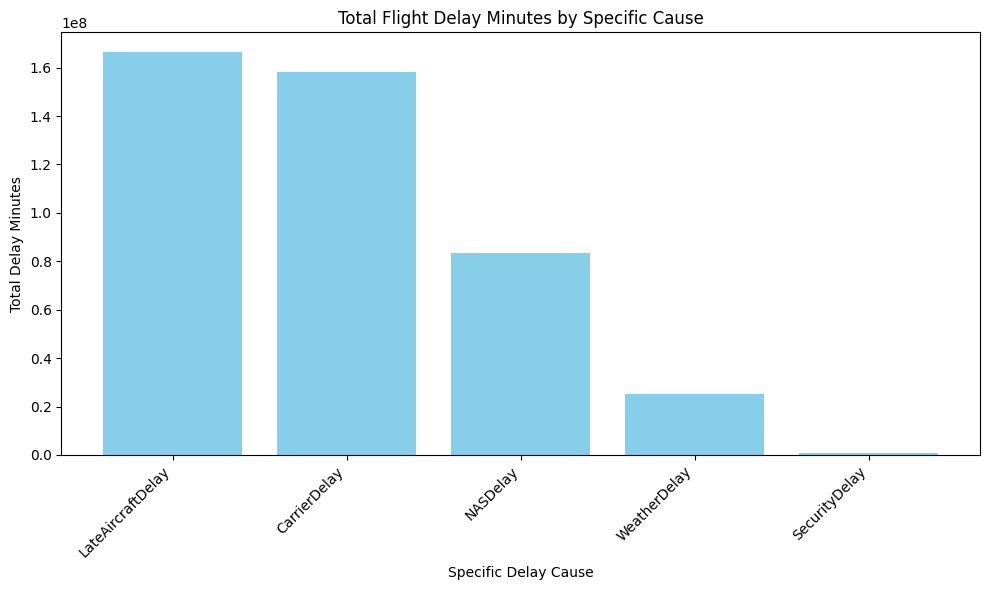


--- Analysis 2: Average arrival delay by Reporting Airline ---
Average arrival delay by Reporting Airline:
+-----------------+--------------------------+---------------+
|Reporting_Airline|AverageArrivalDelayMinutes|NumberOfFlights|
+-----------------+--------------------------+---------------+
|               B6|         21.11076898660025|        1335771|
|               F9|        19.222207460059124|         812889|
|               G4|         18.90390368019653|         604071|
|               EV|        17.970184885824708|         186818|
|               AA|        17.119363255441982|        4857835|
|               YV|         16.07746747007863|         617201|
|               NK|         15.67434369422079|        1161387|
|               UA|        13.848201772750729|        3083231|
|               OO|         13.81900386845936|        3839513|
|               OH|        13.004421360968664|        1233783|
+-----------------+--------------------------+---------------+
only showi

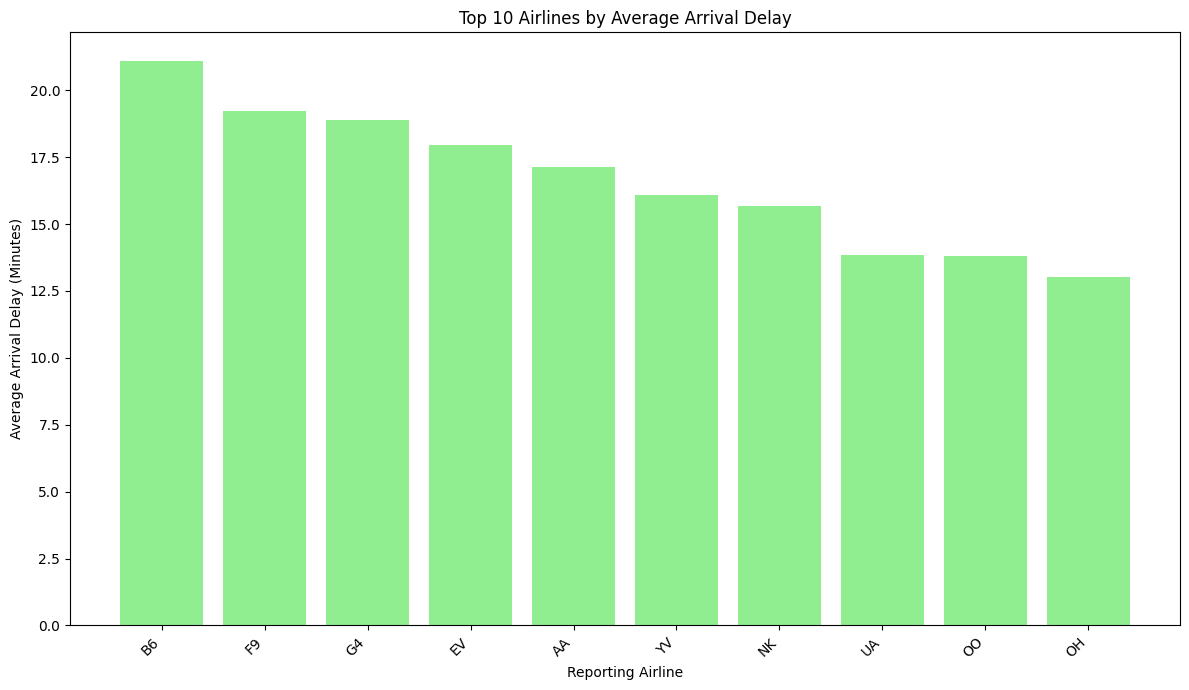


--- Analysis 3: Average arrival delay by Origin Airport ---
Average arrival delay by Origin Airport:
+------+--------------------------+---------------+
|Origin|AverageArrivalDelayMinutes|NumberOfFlights|
+------+--------------------------+---------------+
|   MGW|         74.86486486486487|             37|
|   PPG|          36.8768115942029|            414|
|   BIH|         28.78496042216359|            758|
|   ILG|        28.193939393939395|            165|
|   HYA|        28.036277602523658|            634|
|   MMH|        27.437947494033413|            838|
|   SMX|        26.777662874870735|            967|
|   ASE|        26.641108095350482|          33896|
|   OGS|        26.040979244278873|           1879|
|   HTS|         25.93215228043724|           2653|
+------+--------------------------+---------------+
only showing top 10 rows



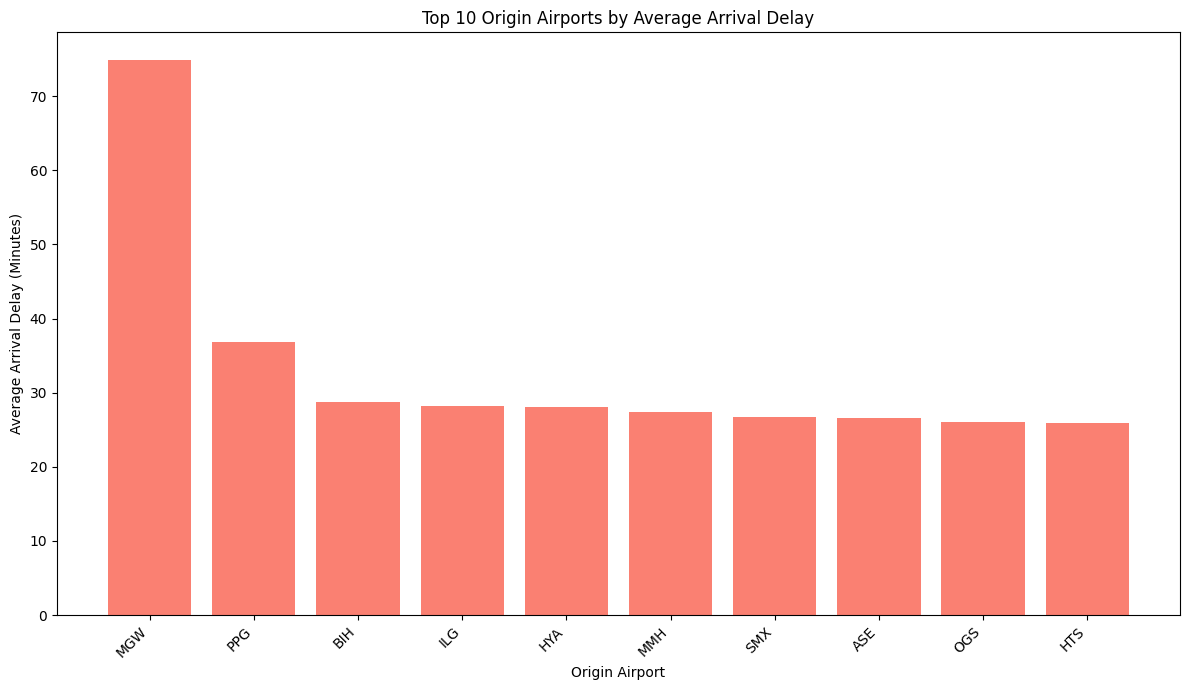


--- Analysis 4: Average arrival delay by Day of Week ---
Average arrival delay by Day of Week:
   DayOfWeek  AverageArrivalDelayMinutes  NumberOfFlights
0     Monday                   13.500721          5298283
1    Tuesday                   11.393224          4913373
2  Wednesday                   11.831379          4968380
3   Thursday                   13.863314          5241853
4     Friday                   14.255567          5298680
5   Saturday                   13.015574          4564031
6     Sunday                   14.151351          5193526


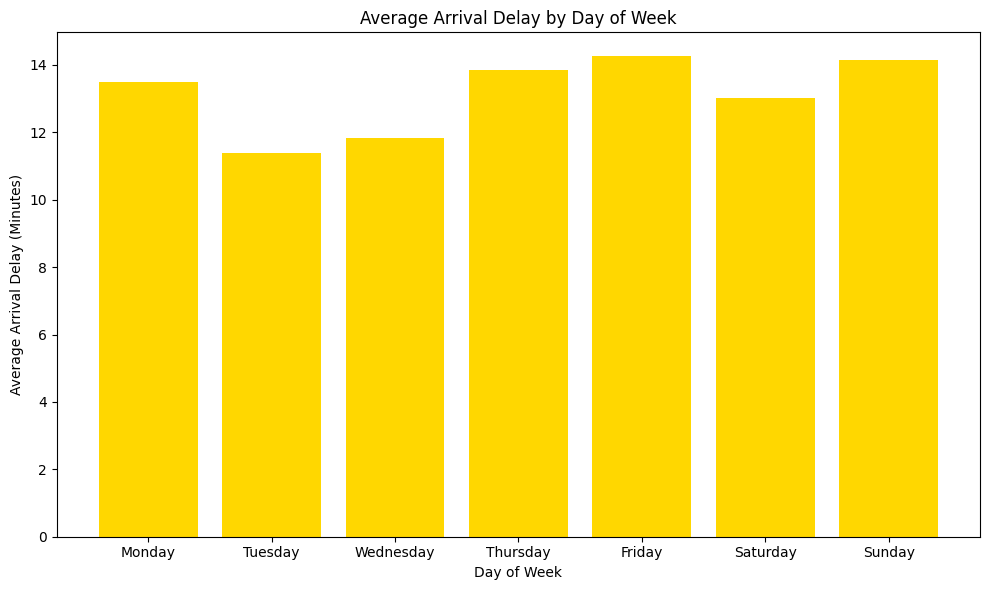


--- Analysis 5: Percentage contribution of each specific delay type ---
Percentage contribution of each specific delay type:
          DelayCause  TotalDelayMinutes  Percentage
4  LateAircraftDelay        166294620.0   38.338545
0       CarrierDelay        158023525.0   36.431678
2           NASDelay         83307193.0   19.206133
1       WeatherDelay         25208491.0    5.811715
3      SecurityDelay           919246.0    0.211928


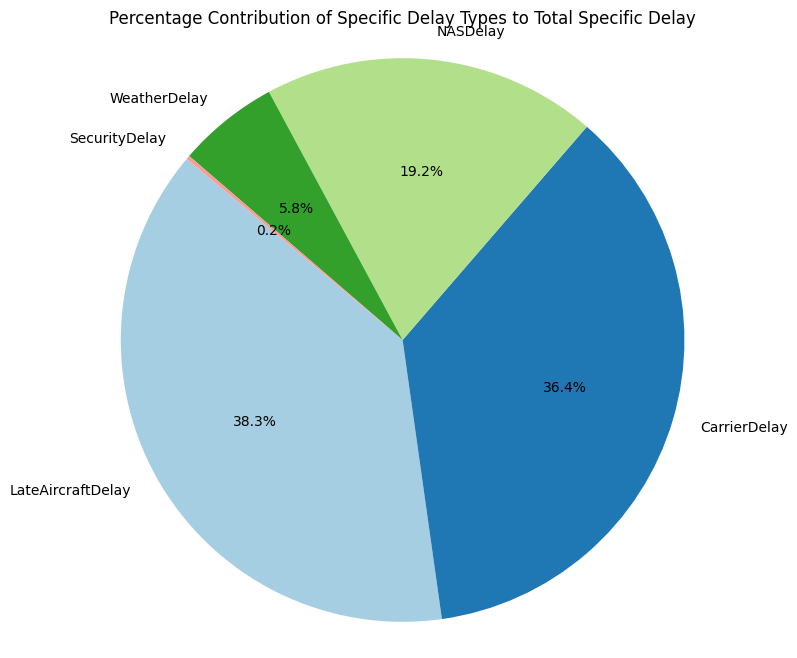


--- Analysis 6: Average arrival delay by Arrival Time Block ---
Average arrival delay by Arrival Time Block:
+----------+--------------------------+---------------+
|ArrTimeBlk|AverageArrivalDelayMinutes|NumberOfFlights|
+----------+--------------------------+---------------+
| 0001-0559|        18.282391889777397|         849989|
| 0600-0659|        10.615747564694464|         492546|
| 0700-0759|         8.659341450845686|        1346718|
| 0800-0859|         8.368990598356312|        1703851|
| 0900-0959|         8.707504421964744|        2113314|
| 1000-1059|          8.51165543872156|        2104125|
| 1100-1159|         9.071413021519888|        2168134|
| 1200-1259|         9.625862728559115|        2169570|
| 1300-1359|         10.54665346077367|        2113198|
| 1400-1459|        11.387081514549797|        2118174|
| 1500-1559|        12.621860905905349|        2075559|
| 1600-1659|        13.503792052692015|        2243376|
| 1700-1759|        15.270346441236756|        221

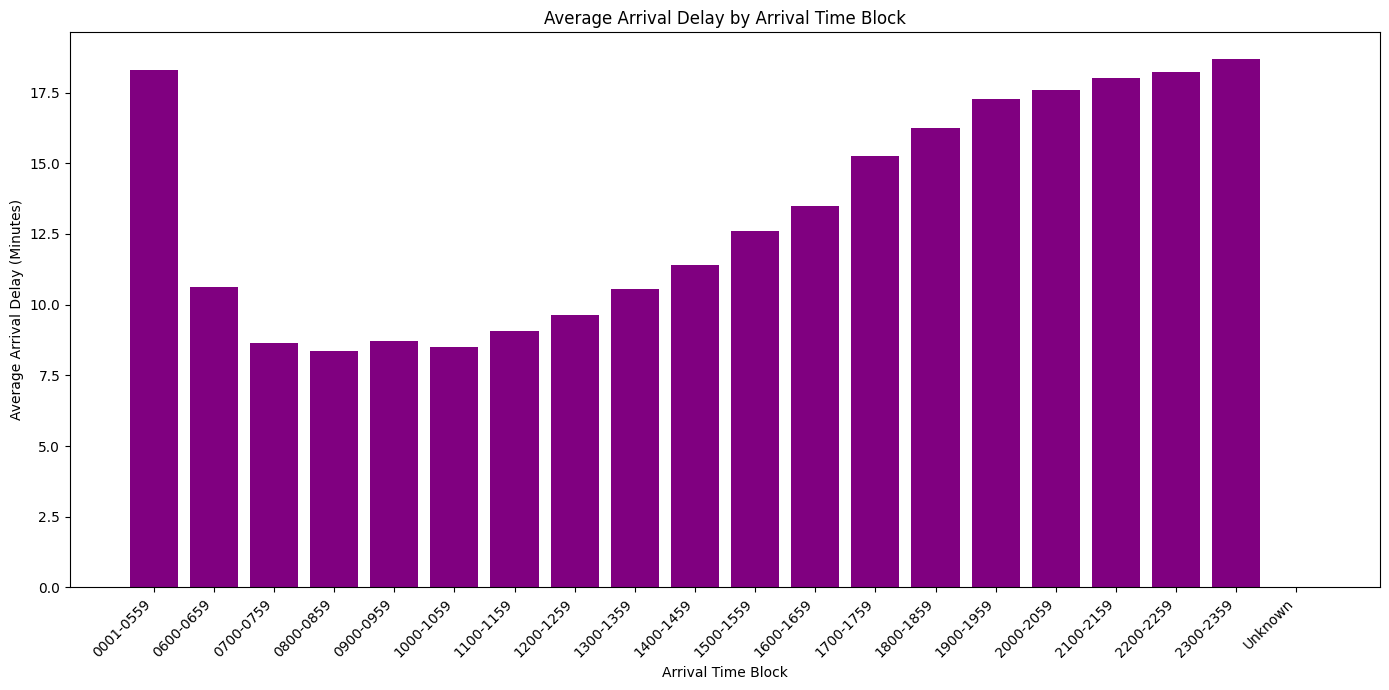


--- Analysis 7: Average arrival delay by Destination Airport ---
Average arrival delay by Destination Airport:
+----+--------------------------+---------------+
|Dest|AverageArrivalDelayMinutes|NumberOfFlights|
+----+--------------------------+---------------+
| IFP|                     222.0|              1|
| MGW|        58.078947368421055|             38|
| IPT|        27.422535211267604|             71|
| PVU|        26.081193515994837|           6971|
| UIN|        24.617784711388456|            641|
| PSE|         24.24558212058212|           3848|
| JST|        24.110481586402265|           2471|
| BQN|        23.950021997360317|          11365|
| OGS|        23.865568544102018|           1882|
| PGD|        23.553809245532555|          32513|
+----+--------------------------+---------------+
only showing top 10 rows



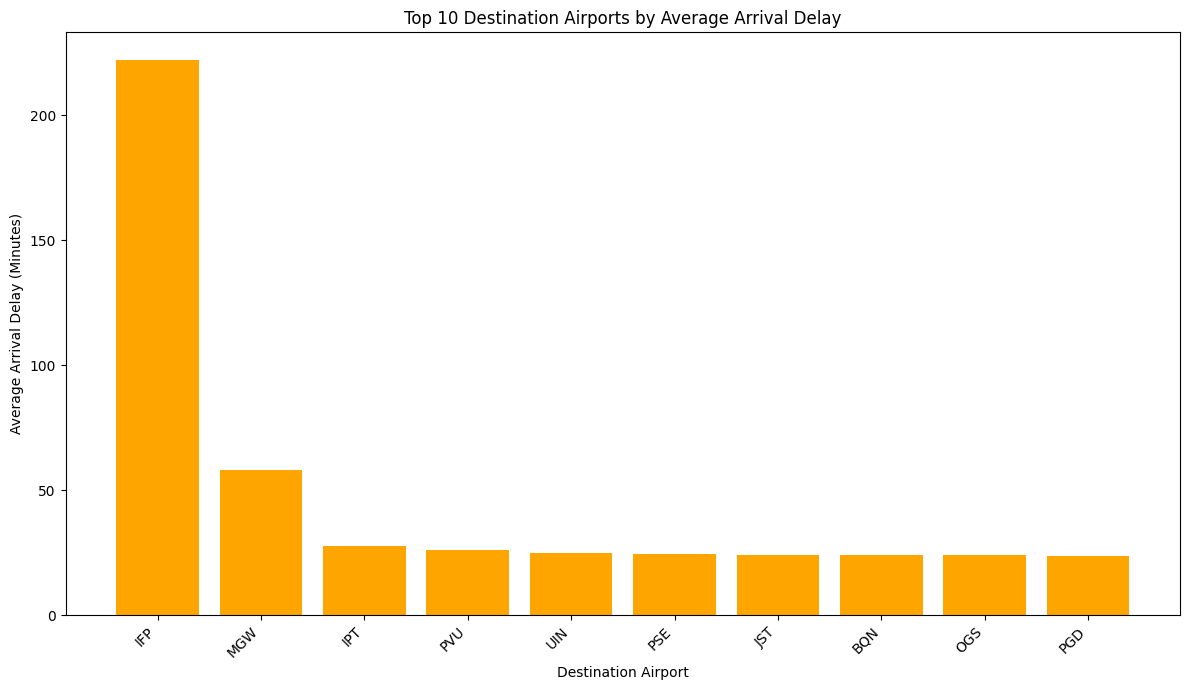


--- Analysis 8: Total Cancelled Flights by Reporting Airline ---
Total Cancelled Flights by Reporting Airline:
+-----------------+---------------------+
|Reporting_Airline|TotalCancelledFlights|
+-----------------+---------------------+
|               WN|               194993|
|               AA|               117992|
|               OO|                80530|
|               UA|                62423|
|               DL|                60626|
|               YX|                47581|
|               MQ|                38140|
|               OH|                34172|
|               B6|                30127|
|               9E|                27393|
+-----------------+---------------------+
only showing top 10 rows



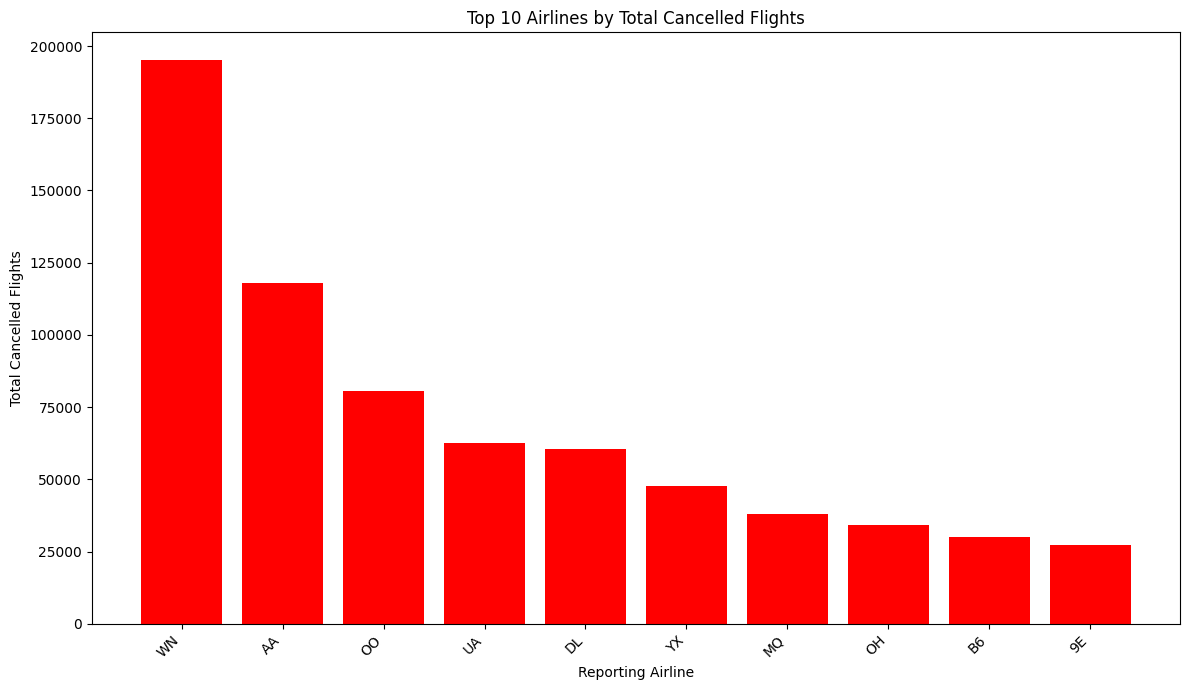


--- Analysis 9: Average Departure Delay by Origin Airport ---
Average departure delay by Origin Airport:
+------+----------------------------+---------------+
|Origin|AverageDepartureDelayMinutes|NumberOfFlights|
+------+----------------------------+---------------+
|   MGW|           76.54054054054055|             37|
|   PPG|          36.533816425120776|            414|
|   BIH|          31.724274406332455|            758|
|   HYA|           28.34384858044164|            634|
|   ASE|           26.27304106679254|          33896|
|   OGS|          26.122937732836615|           1879|
|   MMH|          25.968973747016708|            838|
|   SMX|          25.607032057911066|            967|
|   ILG|          25.503030303030304|            165|
|   HTS|          25.309460987561252|           2653|
+------+----------------------------+---------------+
only showing top 10 rows



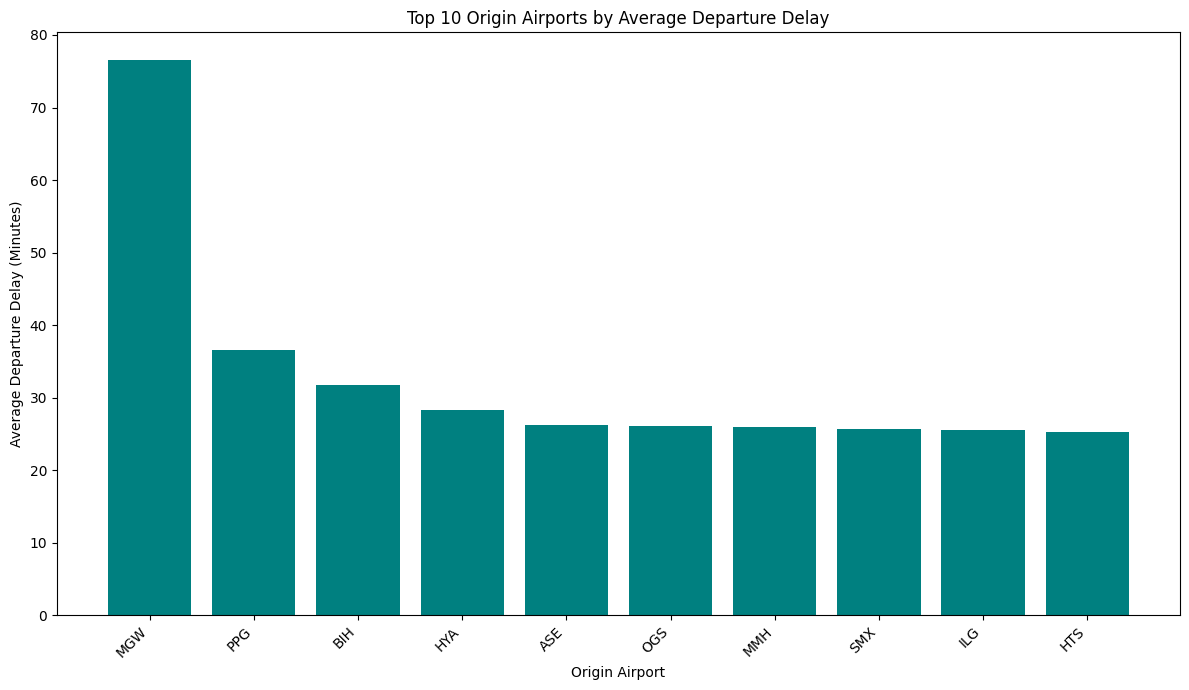


--- Analysis 10: Average Departure Delay by Departure Time Block ---
Average departure delay by Departure Time Block:
+----------+----------------------------+---------------+
|DepTimeBlk|AverageDepartureDelayMinutes|NumberOfFlights|
+----------+----------------------------+---------------+
| 0001-0559|           8.927588599585837|         923791|
| 0600-0659|           7.494383237028238|        2497791|
| 0700-0759|           8.032974820074273|        2428641|
| 0800-0859|           8.390534867703115|        2434789|
| 0900-0959|           9.144601387978764|        2072366|
| 1000-1059|          10.201654465840203|        2250394|
| 1100-1159|          10.916699745685529|        2242106|
| 1200-1259|          12.174495246416917|        2165314|
| 1300-1359|          13.318087989947651|        2132039|
| 1400-1459|          14.617255158576457|        2078335|
| 1500-1559|          15.346491246807236|        2106717|
|   1600-16|                         1.0|              1|
| 1600-1659

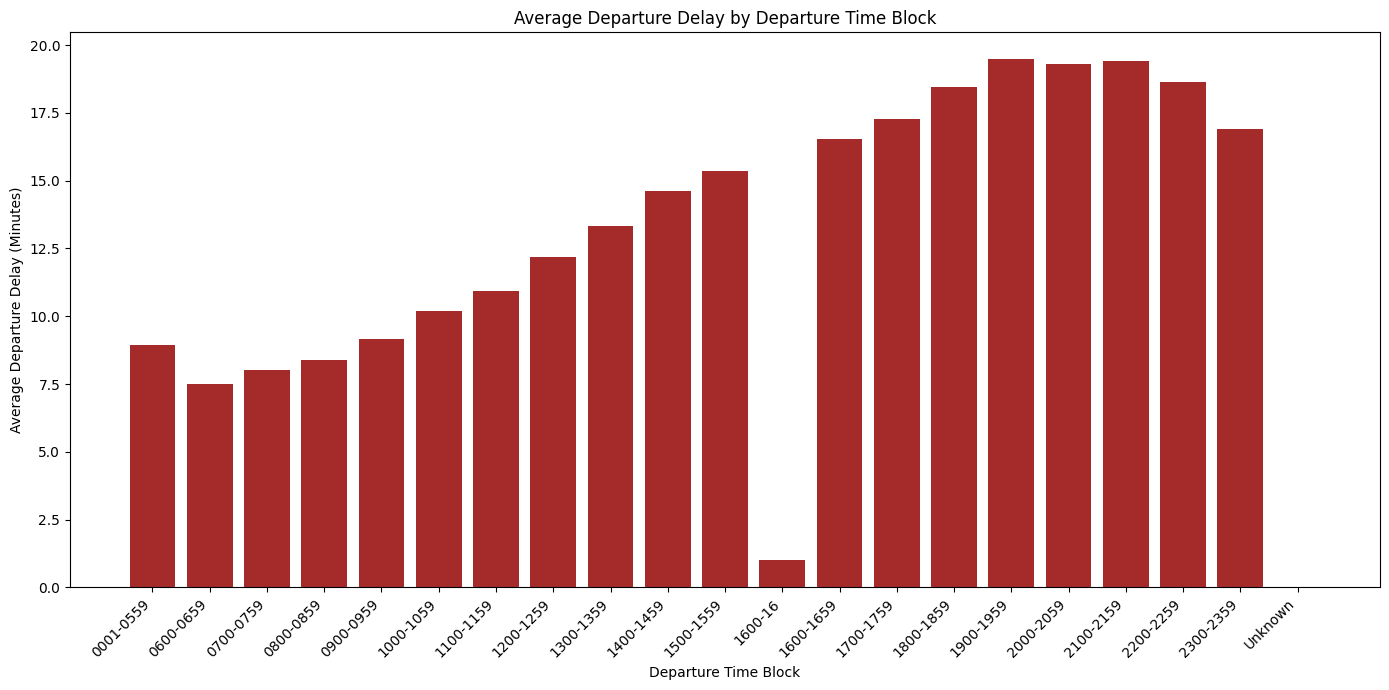


--- Analysis 11: Average Delay by Month ---
Average delay by Month:
      Month  AverageArrivalDelayMinutes  NumberOfFlights
0   Unknown                    0.000000                1
1       Jan                   13.168804          3060702
2       Feb                   12.692297          2839278
3       Mar                   11.716811          3236147
4       Apr                   12.402109          2713532
5       May                   13.261396          2657826
6       Jun                   17.679653          2736065
7       Jul                   17.814061          2943531
8       Aug                   14.990469          2901292
9       Sep                   10.335912          3149908
10      Oct                   10.248480          3241168
11      Nov                    9.934578          3012165
12      Dec                   14.812299          2986511


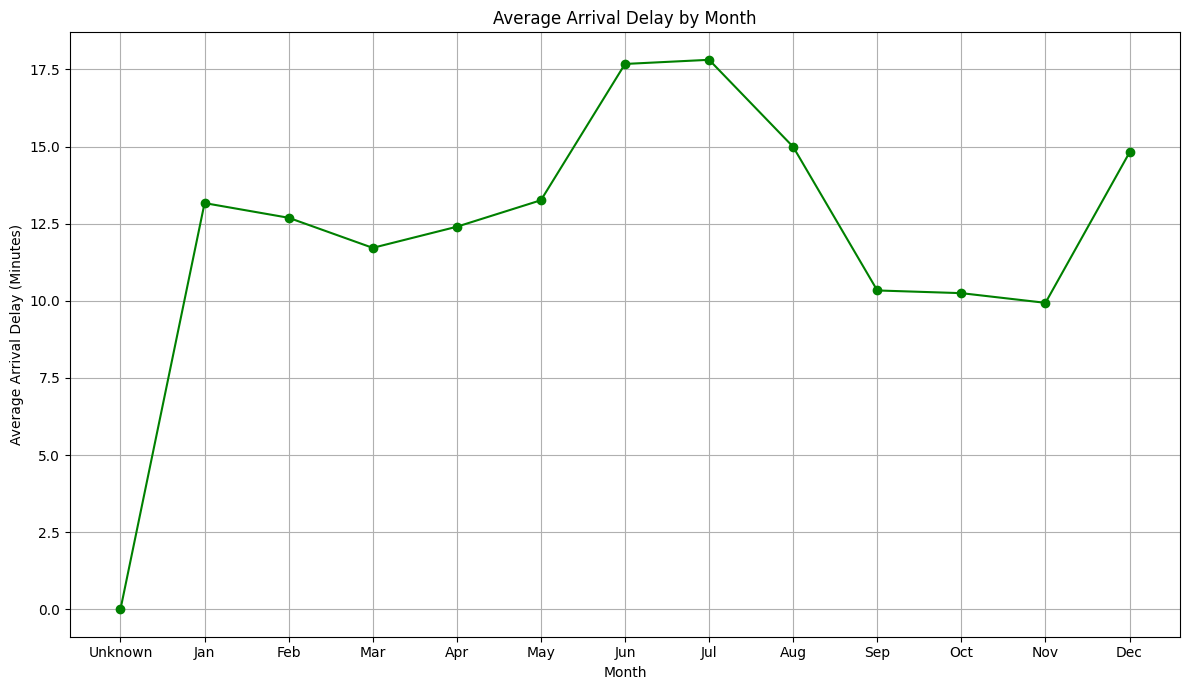


--- Analysis 12: Relationship between Distance and Average Delay ---
Average delay by Distance Group:
+-------------+--------------------------+---------------+
|DistanceGroup|AverageArrivalDelayMinutes|NumberOfFlights|
+-------------+--------------------------+---------------+
|           -1|                       2.8|             10|
|            1|        12.091237123370679|        4343528|
|            2|        12.073513784769531|        8289765|
|            3|        13.116556036258466|        7112270|
|            4|        13.783928950025944|        5735456|
|            5|        15.310950849283891|        4003726|
|            6|        13.286918323725308|        1612194|
|            7|        14.080954365425285|        1542931|
|            8|        12.551223596032568|         744159|
|            9|        13.715086210856045|         544305|
|           10|        13.543465702970114|         865556|
|           11|        13.840393378795895|         684226|
+-----------

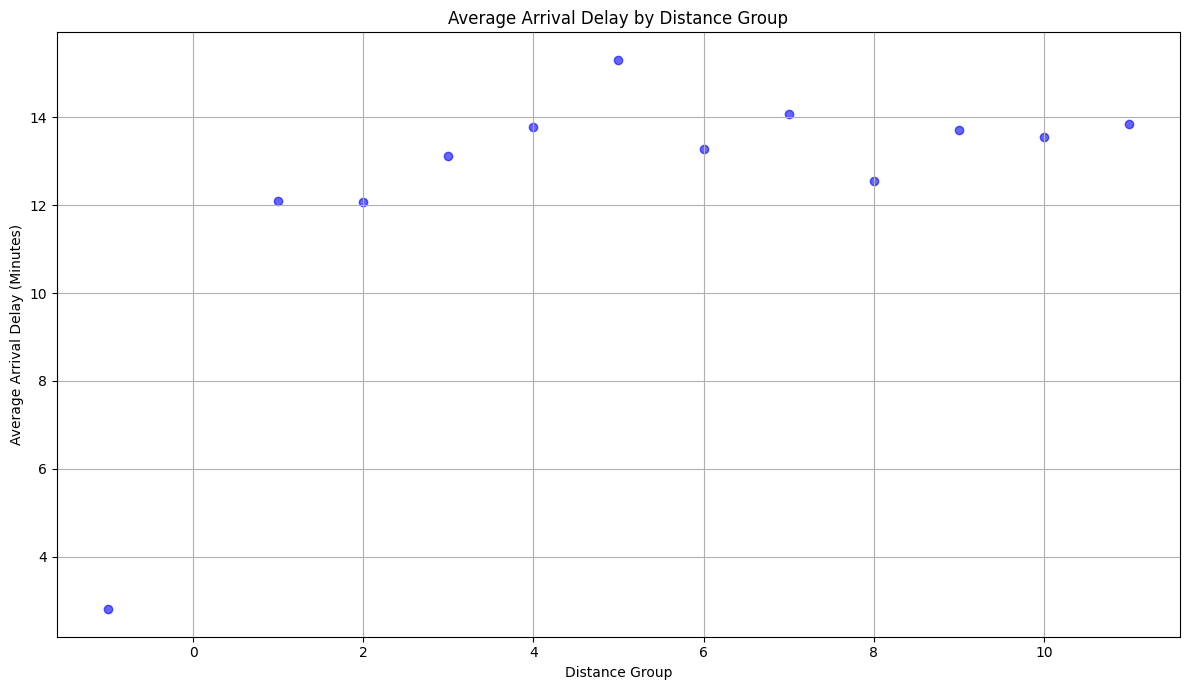


--- Analysis 13: Average Departure Delay by Hour of Day ---
Average departure delay by Hour of Day:
+-------------+----------------------------+---------------+
|DepartureHour|AverageDepartureDelayMinutes|NumberOfFlights|
+-------------+----------------------------+---------------+
|            0|           11.13088149347413|         953053|
|            1|           96.64694291183426|          53286|
|            2|          117.37435838941485|          17534|
|            3|           82.22071516646116|           8921|
|            4|           5.367852760736196|          89650|
|            5|          1.7369039464632121|        1338743|
|            6|           3.471427693436766|        2212842|
|            7|           6.230646605428094|        2110870|
|            8|           7.416267509802982|        2233249|
|            9|            9.89837766622818|        1982576|
|           10|          10.067486687049158|        2160678|
|           11|          10.934975366228624| 

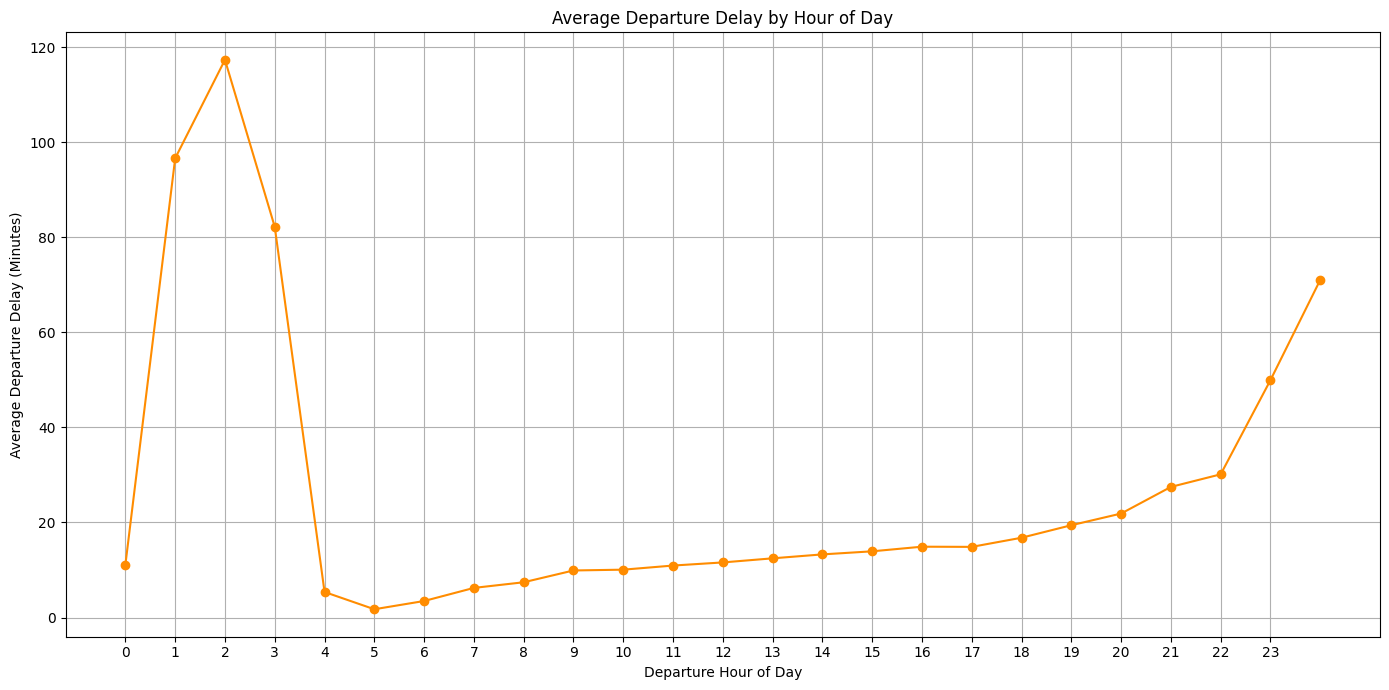


--- Analysis 14: Average Arrival Delay by Hour of Day ---
Average arrival delay by Hour of Day:
+-----------+--------------------------+---------------+
|ArrivalHour|AverageArrivalDelayMinutes|NumberOfFlights|
+-----------+--------------------------+---------------+
|          0|        18.855307701108302|        1512133|
|          1|         88.14657619672559|         214878|
|          2|         139.3371295260971|          72441|
|          3|        161.37675706375126|          28172|
|          4|        27.804704500246974|          74907|
|          5|         6.873782544606119|         221158|
|          6|        4.4840331170220855|         565389|
|          7|         3.759931592879564|        1325593|
|          8|         5.247668350914517|        1692150|
|          9|         6.469617908207765|        2044247|
|         10|         8.170007218937663|        2021073|
|         11|         8.791198635379326|        2096993|
|         12|         9.725735484927869|        

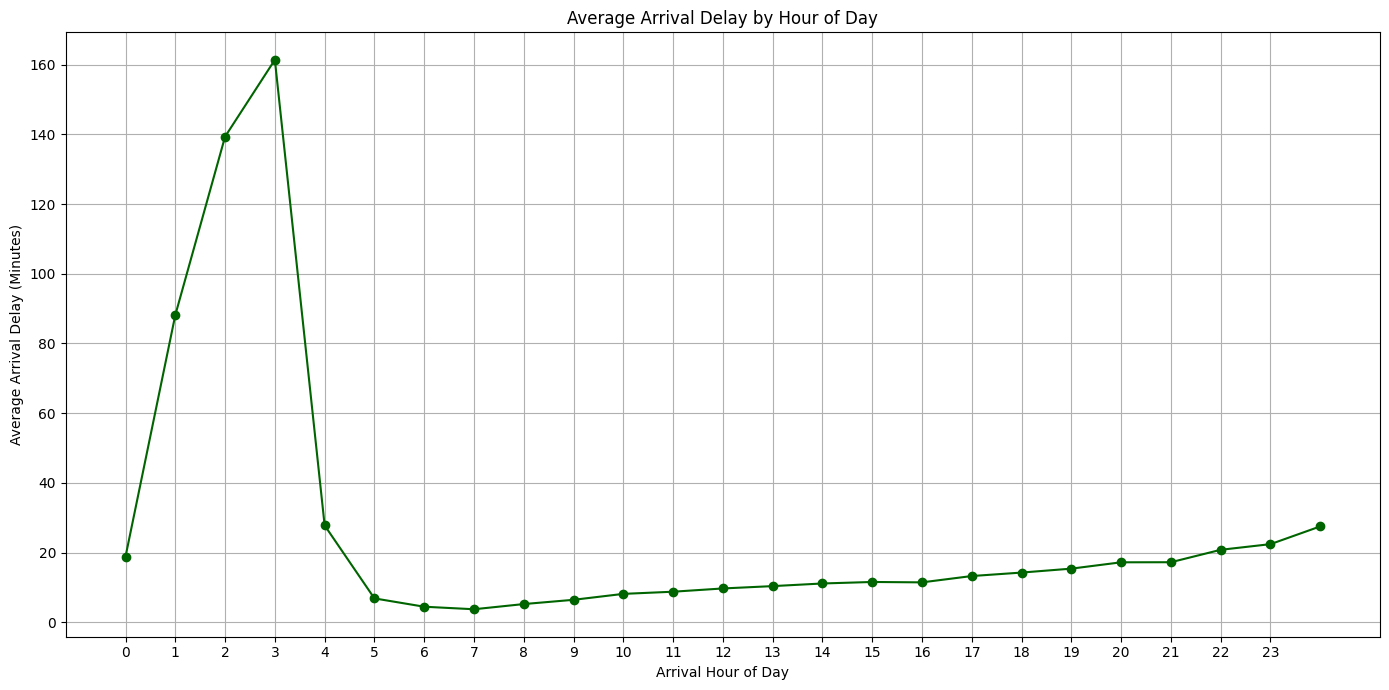


--- Analysis 15: Average Arrival Delay by Airline and Origin Airport Combination ---
Average arrival delay by Airline and Origin Airport Combination (Top 10):
+-----------------+------+--------------------------+---------------+
|Reporting_Airline|Origin|AverageArrivalDelayMinutes|NumberOfFlights|
+-----------------+------+--------------------------+---------------+
|               F9|   BFF|                     921.0|              1|
|               AA|   SBN|                     259.0|              4|
|               YX|   ABE|                     130.0|              1|
|               EV|   MYR|        110.39682539682539|             63|
|               EV|   AVL|         90.21428571428571|             28|
|               AA|   RDM|         89.14393939393939|            132|
|               OO|   MGW|         74.86486486486487|             37|
|               OH|   PBI|         62.38709677419355|             31|
|               NK|   LFT|                      59.0|              1|


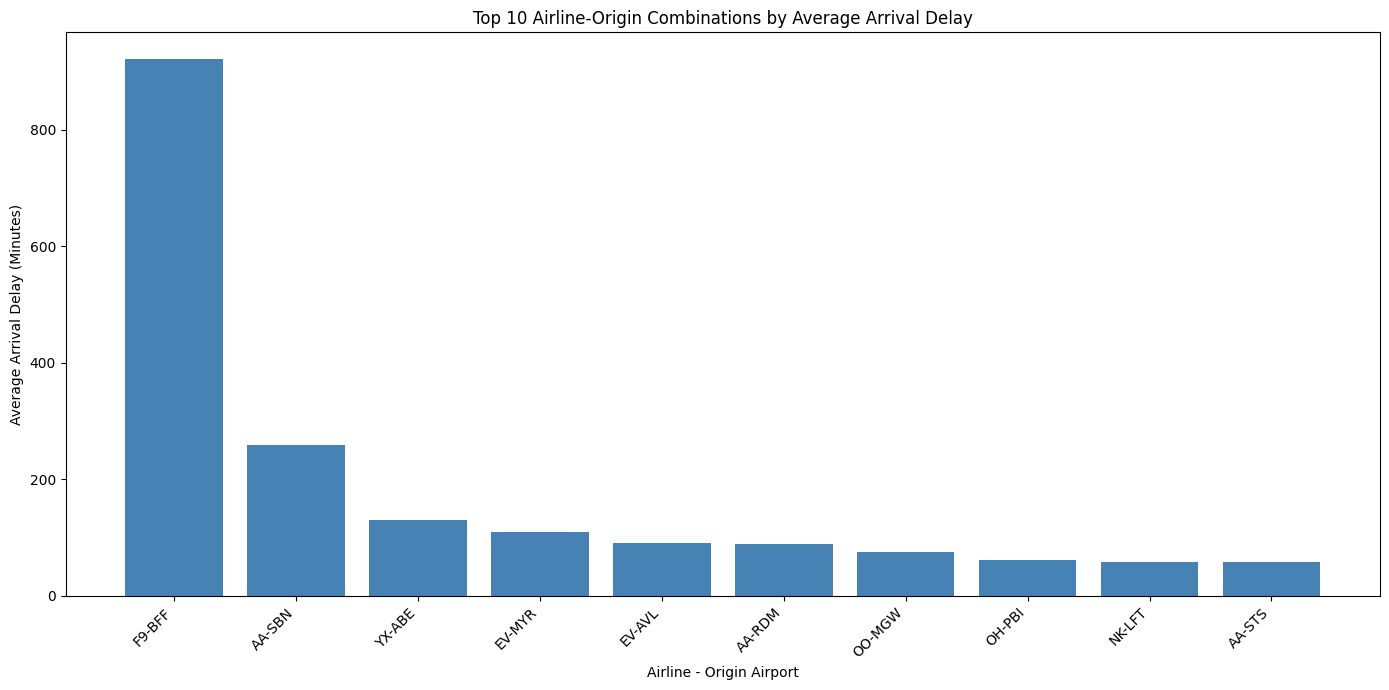


--- Analysis 16: Average Arrival Delay by Airline and Destination Airport Combination ---
Average arrival delay by Airline and Destination Airport Combination (Top 10):
+-----------------+----+--------------------------+---------------+
|Reporting_Airline|Dest|AverageArrivalDelayMinutes|NumberOfFlights|
+-----------------+----+--------------------------+---------------+
|               G4| IFP|                     222.0|              1|
|               YX| ABE|                     158.0|              1|
|               AA| RDM|          66.4090909090909|            132|
|               YV| TVC|         66.27272727272727|             22|
|               OO| MGW|        58.078947368421055|             38|
|               YV| CLL|                      50.0|              2|
|               YV| AGS|         47.62921348314607|            178|
|               EV| HOU|                      47.5|              4|
|               AA| GRB|                      43.5|             24|
|             

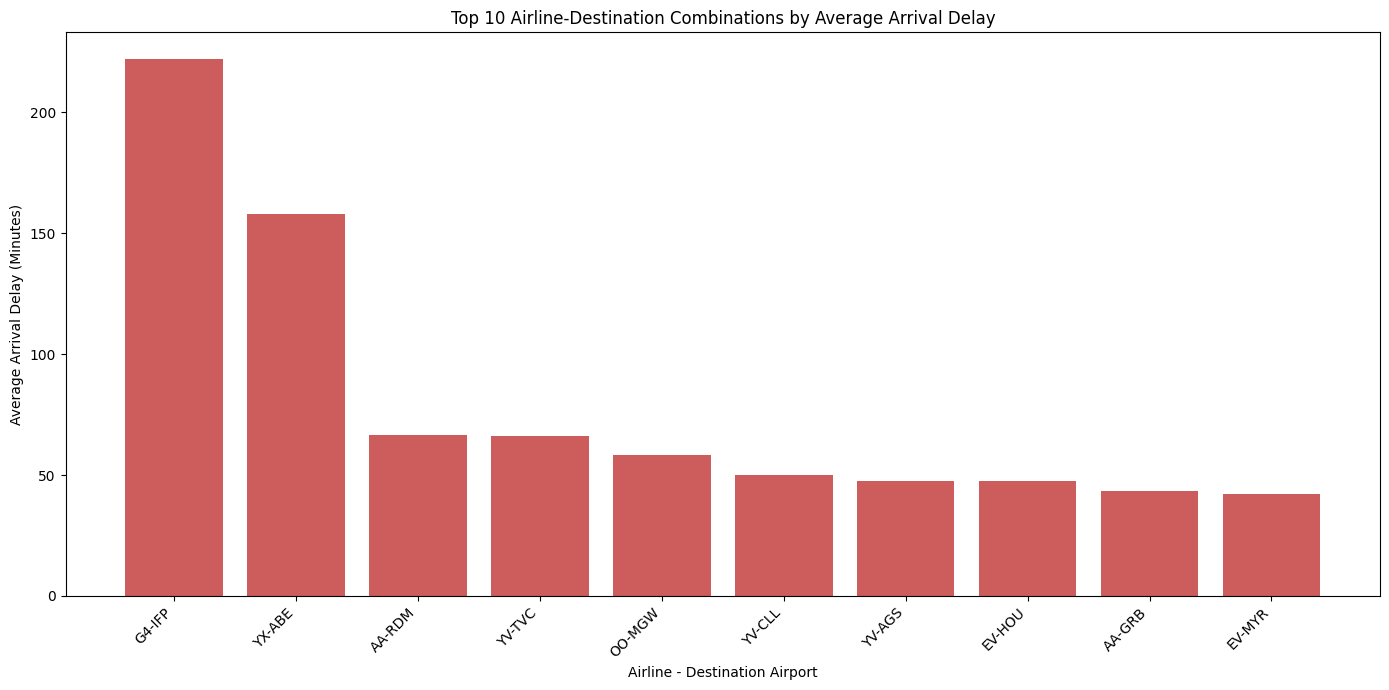


--- Overall Interpretation ---
Analysis of the flight delay dataset reveals several key patterns:

Specific Delay Causes:
The most significant specific causes of delay by total accumulated minutes are:
- LateAircraftDelay: 166294620.00 minutes
- CarrierDelay: 158023525.00 minutes
- NASDelay: 83307193.00 minutes
- WeatherDelay: 25208491.00 minutes
- SecurityDelay: 919246.00 minutes

Airline Performance:
Airlines with the highest average arrival delays include:
- B6: 21.11 minutes (based on 1335771 flights)
- F9: 19.22 minutes (based on 812889 flights)
- G4: 18.90 minutes (based on 604071 flights)
- EV: 17.97 minutes (based on 186818 flights)
- AA: 17.12 minutes (based on 4857835 flights)
- YV: 16.08 minutes (based on 617201 flights)
- NK: 15.67 minutes (based on 1161387 flights)
- UA: 13.85 minutes (based on 3083231 flights)
- OO: 13.82 minutes (based on 3839513 flights)
- OH: 13.00 minutes (based on 1233783 flights)

Airport Hotspots (Origin - Arrival Delay):
Origin airports experienc

In [15]:
# Check if the Spark session is active before attempting to load data
# This approach checks the underlying Java SparkContext status
# If you see an error here, please restart the Colab runtime (Runtime -> Restart runtime)
if spark.sparkContext._jsc is None or spark.sparkContext._jsc.sc().isStopped():
    print("Error: SparkContext is stopped. Cannot load data. Please restart the Colab runtime.")
    data_loaded = False
else:
    # Check if the path(s) exist and load data
    data_loaded = False
    if isinstance(file_paths, str):
        # If file_paths is a string, check if it's a directory or a single file
        if not os.path.exists(file_paths):
            print(f"Error: The specified path '{file_paths}' does not exist.")
        else:
            try:
                # Spark can read directly from a directory path, loading all files within it.
                # Or it can read a single file if the path points to a file.
                df = spark.read.csv(file_paths, header=True, inferSchema=True)
                print(f"Dataset(s) loaded from path: {file_paths}")
                data_loaded = True
            except Exception as e:
                print(f"An error occurred while reading data from path {file_paths}: {e}")
    elif isinstance(file_paths, list):
        # If file_paths is a list, Spark can handle reading multiple files directly
        # We can optionally check if each file exists, but Spark will error if not found during read
        all_files_exist = True
        for f_path in file_paths:
            if not os.path.exists(f_path):
                print(f"Warning: File '{f_path}' does not exist.")
                all_files_exist = False # Or you might choose to break and not attempt reading

        if all_files_exist and file_paths: # Ensure the list is not empty
            try:
                df = spark.read.csv(file_paths, header=True, inferSchema=True)
                print(f"Dataset(s) loaded from list of files: {file_paths}")
                data_loaded = True
            except Exception as e:
                print(f"An error occurred while reading data from list of files {file_paths}: {e}")
        elif not file_paths:
            print("Error: The list of file paths is empty.")
    else:
        print(f"Error: Invalid type for file_paths. Expected string or list, but got {type(file_paths)}")


# Proceed with analysis only if data was loaded successfully
if data_loaded:
    # Print the list of files that were read
    print("\nFiles successfully read by Spark:")
    for file in df.inputFiles():
        print(file)

    # 3. Data Exploration and Preprocessing:
    # Display the schema and a few rows of the DataFrame.
    print("\nDataset Schema:")
    df.printSchema()

    print("\nFirst 5 rows of the dataset:")
    df.show(5)

    # Handle missing values or incorrect data types in relevant columns.
    # The delay columns are CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay.
    # Coalesce null values in delay columns to 0, as null likely means no delay of that type.
    delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelayMinutes', 'DepDelayMinutes']
    for delay_col in delay_columns:
        df = df.withColumn(delay_col, coalesce(col(delay_col), lit(0.0)))

    # Ensure delay columns are numeric (inferSchema should handle this, but good practice to be aware)
    # If schema inference fails, you might need to cast columns:
    # from pyspark.sql.types import DoubleType
    # for delay_col in delay_columns:
    #     df = df.withColumn(delay_col, col(delay_col).cast(DoubleType()))

    # Coalesce ArrTimeBlk and DepTimeBlk to a string to handle potential None values for plotting
    df = df.withColumn("ArrTimeBlk", coalesce(col("ArrTimeBlk").cast("string"), lit("Unknown")))
    df = df.withColumn("DepTimeBlk", coalesce(col("DepTimeBlk").cast("string"), lit("Unknown")))

    # Coalesce DistanceGroup to a numerical placeholder to handle potential None values for plotting
    df = df.withColumn("DistanceGroup", coalesce(col("DistanceGroup"), lit(-1)))


    print("\nSchema after handling potential nulls in delay columns and time blocks:")
    df.printSchema()

    # Add a total delay column for easier analysis (sum of specific delay types)
    specific_delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
    delay_cols_to_sum = [col(c) for c in specific_delay_cols]
    if delay_cols_to_sum: # Ensure the list is not empty
        total_specific_delay_expression = reduce(lambda x, y: x + y, delay_cols_to_sum)
        df = df.withColumn("TotalSpecificDelayMinutes", total_specific_delay_expression)
    else:
        # Handle case where there are no specific delay columns to sum
        df = df.withColumn("TotalSpecificDelayMinutes", lit(0.0)) # Or handle as appropriate


    # 4. Delay Analysis:

    # Analysis 1: Total delay minutes by specific cause
    print("\n--- Analysis 1: Total delay minutes by specific cause ---")
    delay_cause_totals = df.agg(
        sum("CarrierDelay").alias("CarrierDelay_Total"),
        sum("WeatherDelay").alias("WeatherDelay_Total"),
        sum("NASDelay").alias("NASDelay_Total"),
        sum("SecurityDelay").alias("SecurityDelay_Total"),
        sum("LateAircraftDelay").alias("LateAircraftDelay_Total")
    )

    print("Total delay minutes by cause:")
    delay_cause_totals.show()

    # Convert to Pandas for visualization and finding top causes
    delay_totals_pd = delay_cause_totals.toPandas()
    delay_totals_unpivoted = delay_totals_pd.melt(var_name='DelayCause', value_name='TotalDelayMinutes')
    delay_totals_unpivoted['DelayCause'] = delay_totals_unpivoted['DelayCause'].str.replace('_Total', '')
    top_causes_total = delay_totals_unpivoted.sort_values(by='TotalDelayMinutes', ascending=False)

    N_causes = 5 # Number of top causes to display
    print(f"\nTop {N_causes} Specific Delay Causes (by total minutes):")
    print(top_causes_total.head(min(N_causes, len(top_causes_total))))

    # Visualization 1: Bar chart of total delay minutes by specific cause
    plt.figure(figsize=(10, 6))
    plt.bar(top_causes_total['DelayCause'], top_causes_total['TotalDelayMinutes'], color='skyblue')
    plt.xlabel('Specific Delay Cause')
    plt.ylabel('Total Delay Minutes')
    plt.title('Total Flight Delay Minutes by Specific Cause')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # Analysis 2: Average arrival delay by Reporting Airline
    print("\n--- Analysis 2: Average arrival delay by Reporting Airline ---")
    avg_delay_by_airline = df.groupBy("Reporting_Airline").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy(desc("AverageArrivalDelayMinutes"))

    print("Average arrival delay by Reporting Airline:")
    avg_delay_by_airline.show(10) # Show top 10 airlines by average delay

    # Visualization 2: Bar chart of average arrival delay by Reporting Airline (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    avg_delay_airline_pd = avg_delay_by_airline.limit(10).toPandas()
    plt.figure(figsize=(12, 7))
    plt.bar(avg_delay_airline_pd['Reporting_Airline'], avg_delay_airline_pd['AverageArrivalDelayMinutes'], color='lightgreen')
    plt.xlabel('Reporting Airline')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Top 10 Airlines by Average Arrival Delay')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Analysis 3: Average arrival delay by Origin Airport
    print("\n--- Analysis 3: Average arrival delay by Origin Airport ---")
    avg_delay_by_origin = df.groupBy("Origin").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy(desc("AverageArrivalDelayMinutes"))

    print("Average arrival delay by Origin Airport:")
    avg_delay_by_origin.show(10) # Show top 10 origin airports by average delay

    # Visualization 3: Bar chart of average arrival delay by Origin Airport (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    avg_delay_origin_pd = avg_delay_by_origin.limit(10).toPandas()
    plt.figure(figsize=(12, 7))
    plt.bar(avg_delay_origin_pd['Origin'], avg_delay_origin_pd['AverageArrivalDelayMinutes'], color='salmon')
    plt.xlabel('Origin Airport')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Top 10 Origin Airports by Average Arrival Delay')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # Analysis 4: Average arrival delay by Day of Week
    print("\n--- Analysis 4: Average arrival delay by Day of Week ---")
    # Map day of week number to name for better readability
    avg_delay_by_dayofweek = df.groupBy("DayOfWeek").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("DayOfWeek") # Order by day number (1=Monday, 7=Sunday)

    # Convert to Pandas to map day number to name and plot
    avg_delay_dayofweek_pd = avg_delay_by_dayofweek.toPandas()
    day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
    avg_delay_dayofweek_pd['DayOfWeek'] = avg_delay_dayofweek_pd['DayOfWeek'].map(day_names)

    print("Average arrival delay by Day of Week:")
    print(avg_delay_dayofweek_pd)

    # Visualization 4: Bar chart of average arrival delay by Day of Week
    plt.figure(figsize=(10, 6))
    plt.bar(avg_delay_dayofweek_pd['DayOfWeek'], avg_delay_dayofweek_pd['AverageArrivalDelayMinutes'], color='gold')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Average Arrival Delay by Day of Week')
    plt.tight_layout()
    plt.show()

    # Analysis 5: Percentage contribution of each specific delay type to total specific delay
    print("\n--- Analysis 5: Percentage contribution of each specific delay type ---")

    total_sum_of_specific_delays = delay_cause_totals.agg(sum(col("CarrierDelay_Total") + col("WeatherDelay_Total") + col("NASDelay_Total") + col("SecurityDelay_Total") + col("LateAircraftDelay_Total"))).collect()[0][0]

    if total_sum_of_specific_delays is not None and total_sum_of_specific_delays > 0:
        delay_cause_percentages = delay_totals_unpivoted.copy()
        delay_cause_percentages['Percentage'] = (delay_cause_percentages['TotalDelayMinutes'] / total_sum_of_specific_delays) * 100
        delay_cause_percentages_sorted = delay_cause_percentages.sort_values(by='Percentage', ascending=False)

        print("Percentage contribution of each specific delay type:")
        print(delay_cause_percentages_sorted)

        # Visualization 5: Pie chart of percentage contribution of specific delay types
        plt.figure(figsize=(8, 8))
        plt.pie(delay_cause_percentages_sorted['Percentage'], labels=delay_cause_percentages_sorted['DelayCause'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Percentage Contribution of Specific Delay Types to Total Specific Delay')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print("Total specific delay minutes is zero or None, cannot calculate percentages.")


    # --- Additional Analyses and Visualizations ---

    # Analysis 6: Average arrival delay by Time Block (ArrTimeBlk)
    print("\n--- Analysis 6: Average arrival delay by Arrival Time Block ---")
    # Coalesce ArrTimeBlk to a string to handle potential None values for plotting
    avg_delay_by_time_blk = df.groupBy("ArrTimeBlk").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("ArrTimeBlk") # Order by time block

    print("Average arrival delay by Arrival Time Block:")
    avg_delay_by_time_blk.show()

    # Visualization 6: Bar chart of average arrival delay by Time Block
    avg_delay_time_blk_pd = avg_delay_by_time_blk.toPandas()
    plt.figure(figsize=(14, 7))
    plt.bar(avg_delay_time_blk_pd['ArrTimeBlk'], avg_delay_time_blk_pd['AverageArrivalDelayMinutes'], color='purple')
    plt.xlabel('Arrival Time Block')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Average Arrival Delay by Arrival Time Block')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # Analysis 7: Average arrival delay by Destination Airport
    print("\n--- Analysis 7: Average arrival delay by Destination Airport ---")
    avg_delay_by_dest = df.groupBy("Dest").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy(desc("AverageArrivalDelayMinutes"))

    print("Average arrival delay by Destination Airport:")
    avg_delay_by_dest.show(10) # Show top 10 destination airports by average delay

    # Visualization 7: Bar chart of average arrival delay by Destination Airport (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    avg_delay_dest_pd = avg_delay_by_dest.limit(10).toPandas()
    plt.figure(figsize=(12, 7))
    plt.bar(avg_delay_dest_pd['Dest'], avg_delay_dest_pd['AverageArrivalDelayMinutes'], color='orange')
    plt.xlabel('Destination Airport')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Top 10 Destination Airports by Average Arrival Delay')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # Analysis 8: Total Cancelled Flights by Reporting Airline
    print("\n--- Analysis 8: Total Cancelled Flights by Reporting Airline ---")
    cancelled_flights_by_airline = df.filter(col("Cancelled") == 1.0).groupBy("Reporting_Airline").agg(
        count("*").alias("TotalCancelledFlights")
    ).orderBy(desc("TotalCancelledFlights"))

    print("Total Cancelled Flights by Reporting Airline:")
    cancelled_flights_by_airline.show(10) # Show top 10 airlines by cancelled flights

    # Visualization 8: Bar chart of Total Cancelled Flights by Reporting Airline (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    cancelled_flights_airline_pd = cancelled_flights_by_airline.limit(10).toPandas()
    plt.figure(figsize=(12, 7))
    plt.bar(cancelled_flights_airline_pd['Reporting_Airline'], cancelled_flights_airline_pd['TotalCancelledFlights'], color='red')
    plt.xlabel('Reporting Airline')
    plt.ylabel('Total Cancelled Flights')
    plt.title('Top 10 Airlines by Total Cancelled Flights')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Analysis 9: Average Departure Delay by Origin Airport
    print("\n--- Analysis 9: Average Departure Delay by Origin Airport ---")
    avg_dep_delay_by_origin = df.groupBy("Origin").agg(
        avg("DepDelayMinutes").alias("AverageDepartureDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy(desc("AverageDepartureDelayMinutes"))

    print("Average departure delay by Origin Airport:")
    avg_dep_delay_by_origin.show(10) # Show top 10 origin airports by average departure delay

    # Visualization 9: Bar chart of Average Departure Delay by Origin Airport (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    avg_dep_delay_origin_pd = avg_dep_delay_by_origin.limit(10).toPandas()
    plt.figure(figsize=(12, 7))
    plt.bar(avg_dep_delay_origin_pd['Origin'], avg_dep_delay_origin_pd['AverageDepartureDelayMinutes'], color='teal')
    plt.xlabel('Origin Airport')
    plt.ylabel('Average Departure Delay (Minutes)')
    plt.title('Top 10 Origin Airports by Average Departure Delay')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Analysis 10: Average Departure Delay by Time Block (DepTimeBlk)
    print("\n--- Analysis 10: Average Departure Delay by Departure Time Block ---")
    # Coalesce DepTimeBlk to a string to handle potential None values for plotting
    avg_dep_delay_by_time_blk = df.groupBy("DepTimeBlk").agg(
        avg("DepDelayMinutes").alias("AverageDepartureDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("DepTimeBlk") # Order by time block

    print("Average departure delay by Departure Time Block:")
    avg_dep_delay_by_time_blk.show()

    # Visualization 10: Bar chart of Average Departure Delay by Departure Time Block
    avg_dep_delay_time_blk_pd = avg_dep_delay_by_time_blk.toPandas()
    plt.figure(figsize=(14, 7))
    plt.bar(avg_dep_delay_time_blk_pd['DepTimeBlk'], avg_dep_delay_time_blk_pd['AverageDepartureDelayMinutes'], color='brown')
    plt.xlabel('Departure Time Block')
    plt.ylabel('Average Departure Delay (Minutes)')
    plt.title('Average Departure Delay by Departure Time Block')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Analysis 11: Average Delay by Month
    print("\n--- Analysis 11: Average Delay by Month ---")
    # Extract month from FlightDate and calculate average arrival delay
    avg_delay_by_month = df.withColumn("Month", month("FlightDate")).groupBy("Month").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("Month") # Order by month number

    # Convert to Pandas to map month number to name and plot
    avg_delay_month_pd = avg_delay_by_month.toPandas()
    month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    # Map month numbers to names, handling potential None values in the Month column
    avg_delay_month_pd['Month'] = avg_delay_month_pd['Month'].map(month_names).fillna('Unknown')


    print("Average delay by Month:")
    print(avg_delay_month_pd)

    # Visualization 11: Line chart of Average Delay by Month
    plt.figure(figsize=(12, 7))
    plt.plot(avg_delay_month_pd['Month'], avg_delay_month_pd['AverageArrivalDelayMinutes'], marker='o', color='green')
    plt.xlabel('Month')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Average Arrival Delay by Month')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Analysis 12: Relationship between Distance and Average Delay
    print("\n--- Analysis 12: Relationship between Distance and Average Delay ---")
    # Group by DistanceGroup and calculate average arrival delay
    # Coalesce DistanceGroup to a numerical placeholder to handle potential None values
    avg_delay_by_distance_group = df.withColumn("DistanceGroup", coalesce(col("DistanceGroup"), lit(-1))).groupBy("DistanceGroup").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("DistanceGroup") # Order by distance group

    print("Average delay by Distance Group:")
    avg_delay_by_distance_group.show()

    # Visualization 12: Scatter plot of Distance Group vs Average Delay
    avg_delay_distance_group_pd = avg_delay_by_distance_group.toPandas()
    plt.figure(figsize=(12, 7))
    plt.scatter(avg_delay_distance_group_pd['DistanceGroup'], avg_delay_distance_group_pd['AverageArrivalDelayMinutes'], color='blue', alpha=0.6)
    plt.xlabel('Distance Group')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Average Arrival Delay by Distance Group')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Analysis 13: Average Departure Delay by Hour of Day
    print("\n--- Analysis 13: Average Departure Delay by Hour of Day ---")
    # Extract hour from DepTime and calculate average departure delay
    # Coalesce DepTime to 0 if null, convert to string, pad with zeros, and extract hour
    avg_dep_delay_by_hour = df.withColumn(
        "DepartureHour",
        substring(lpad(coalesce(col("DepTime"), lit(0)).cast("string"), 4, "0"), 1, 2).cast("int")
    ).groupBy("DepartureHour").agg(
        avg("DepDelayMinutes").alias("AverageDepartureDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("DepartureHour") # Order by hour

    print("Average departure delay by Hour of Day:")
    avg_dep_delay_by_hour.show()

    # Visualization 13: Line chart of Average Departure Delay by Hour of Day
    avg_dep_delay_hour_pd = avg_dep_delay_by_hour.toPandas()
    plt.figure(figsize=(14, 7))
    plt.plot(avg_dep_delay_hour_pd['DepartureHour'], avg_dep_delay_hour_pd['AverageDepartureDelayMinutes'], marker='o', color='darkorange')
    plt.xlabel('Departure Hour of Day')
    plt.ylabel('Average Departure Delay (Minutes)')
    plt.title('Average Departure Delay by Hour of Day')
    plt.xticks(range(24)) # Set x-axis ticks for each hour
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Analysis 14: Average Arrival Delay by Hour of Day
    print("\n--- Analysis 14: Average Arrival Delay by Hour of Day ---")
    # Extract hour from ArrTime and calculate average arrival delay
    # Coalesce ArrTime to 0 if null, convert to string, pad with zeros, and extract hour
    avg_arr_delay_by_hour = df.withColumn(
        "ArrivalHour",
        substring(lpad(coalesce(col("ArrTime"), lit(0)).cast("string"), 4, "0"), 1, 2).cast("int")
    ).groupBy("ArrivalHour").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy("ArrivalHour") # Order by hour

    print("Average arrival delay by Hour of Day:")
    avg_arr_delay_by_hour.show()

    # Visualization 14: Line chart of Average Arrival Delay by Hour of Day
    avg_arr_delay_hour_pd = avg_arr_delay_by_hour.toPandas()
    plt.figure(figsize=(14, 7))
    plt.plot(avg_arr_delay_hour_pd['ArrivalHour'], avg_arr_delay_hour_pd['AverageArrivalDelayMinutes'], marker='o', color='darkgreen')
    plt.xlabel('Arrival Hour of Day')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Average Arrival Delay by Hour of Day')
    plt.xticks(range(24)) # Set x-axis ticks for each hour
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Analysis 15: Average Arrival Delay by Airline and Origin Airport Combination (Top 10)
    print("\n--- Analysis 15: Average Arrival Delay by Airline and Origin Airport Combination ---")
    avg_delay_airline_origin = df.groupBy("Reporting_Airline", "Origin").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy(desc("AverageArrivalDelayMinutes"))

    print("Average arrival delay by Airline and Origin Airport Combination (Top 10):")
    avg_delay_airline_origin.show(10) # Show top 10 combinations

    # Visualization 15: Bar chart of Average Arrival Delay by Airline and Origin Airport Combination (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    avg_delay_airline_origin_pd = avg_delay_airline_origin.limit(10).toPandas()
    # Combine Airline and Origin for the label
    avg_delay_airline_origin_pd['Airline_Origin'] = avg_delay_airline_origin_pd['Reporting_Airline'] + "-" + avg_delay_airline_origin_pd['Origin']
    plt.figure(figsize=(14, 7))
    plt.bar(avg_delay_airline_origin_pd['Airline_Origin'], avg_delay_airline_origin_pd['AverageArrivalDelayMinutes'], color='steelblue')
    plt.xlabel('Airline - Origin Airport')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Top 10 Airline-Origin Combinations by Average Arrival Delay')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Analysis 16: Average Arrival Delay by Airline and Destination Airport Combination (Top 10)
    print("\n--- Analysis 16: Average Arrival Delay by Airline and Destination Airport Combination ---")
    avg_delay_airline_dest = df.groupBy("Reporting_Airline", "Dest").agg(
        avg("ArrDelayMinutes").alias("AverageArrivalDelayMinutes"),
        count("*").alias("NumberOfFlights")
    ).orderBy(desc("AverageArrivalDelayMinutes"))

    print("Average arrival delay by Airline and Destination Airport Combination (Top 10):")
    avg_delay_airline_dest.show(10) # Show top 10 combinations

    # Visualization 16: Bar chart of Average Arrival Delay by Airline and Destination Airport Combination (Top 10)
    # Apply limit to Spark DataFrame before converting to Pandas
    avg_delay_airline_dest_pd = avg_delay_airline_dest.limit(10).toPandas()
    # Combine Airline and Destination for the label
    avg_delay_airline_dest_pd['Airline_Dest'] = avg_delay_airline_dest_pd['Reporting_Airline'] + "-" + avg_delay_airline_dest_pd['Dest']
    plt.figure(figsize=(14, 7))
    plt.bar(avg_delay_airline_dest_pd['Airline_Dest'], avg_delay_airline_dest_pd['AverageArrivalDelayMinutes'], color='indianred')
    plt.xlabel('Airline - Destination Airport')
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.title('Top 10 Airline-Destination Combinations by Average Arrival Delay')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # 6. Interpretation:
    # Summarize the key findings from the analysis.
    print("\n--- Overall Interpretation ---")
    print("Analysis of the flight delay dataset reveals several key patterns:")

    print("\nSpecific Delay Causes:")
    if not top_causes_total.empty:
        print(f"The most significant specific causes of delay by total accumulated minutes are:")
        for index, row in top_causes_total.head(min(N_causes, len(top_causes_total))).iterrows():
            print(f"- {row['DelayCause']}: {row['TotalDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine top specific delay causes.")


    print("\nAirline Performance:")
    if avg_delay_airline_pd is not None and not avg_delay_airline_pd.empty:
         print(f"Airlines with the highest average arrival delays include:")
         for index, row in avg_delay_airline_pd.iterrows():
             print(f"- {row['Reporting_Airline']}: {row['AverageArrivalDelayMinutes']:.2f} minutes (based on {int(row['NumberOfFlights'])} flights)")
    else:
         print("Could not determine average delay by airline.")


    print("\nAirport Hotspots (Origin - Arrival Delay):")
    if avg_delay_origin_pd is not None and not avg_delay_origin_pd.empty:
         print(f"Origin airports experiencing the highest average arrival delays include:")
         for index, row in avg_delay_origin_pd.iterrows():
             print(f"- {row['Origin']}: {row['AverageArrivalDelayMinutes']:.2f} minutes (based on {int(row['NumberOfFlights'])} flights)")
    else:
         print("Could not determine average arrival delay by origin airport.")

    print("\nAirport Hotspots (Origin - Departure Delay):")
    if avg_dep_delay_origin_pd is not None and not avg_dep_delay_origin_pd.empty:
         print(f"Origin airports experiencing the highest average departure delays include:")
         for index, row in avg_dep_delay_origin_pd.iterrows():
             print(f"- {row['Origin']}: {row['AverageDepartureDelayMinutes']:.2f} minutes (based on {int(row['NumberOfFlights'])} flights)")
    else:
         print("Could not determine average departure delay by origin airport.")


    print("\nAirport Hotspots (Destination):")
    if avg_delay_dest_pd is not None and not avg_delay_dest_pd.empty:
         print(f"Destination airports experiencing the highest average arrival delays include:")
         for index, row in avg_delay_dest_pd.iterrows():
             print(f"- {row['Dest']}: {row['AverageArrivalDelayMinutes']:.2f} minutes (based on {int(row['NumberOfFlights'])} flights)")
    else:
         print("Could not determine average delay by destination airport.")


    print("\nDay of Week Trends:")
    if avg_delay_dayofweek_pd is not None and not avg_delay_dayofweek_pd.empty:
        print("Average arrival delay varies by day of the week. The trend observed is:")
        for index, row in avg_delay_dayofweek_pd.iterrows():
             print(f"- {row['DayOfWeek']}: {row['AverageArrivalDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average delay by day of week.")

    print("\nTime of Day Trends (Arrival Time Block):")
    if avg_delay_time_blk_pd is not None and not avg_delay_time_blk_pd.empty:
        print("Average arrival delay varies by arrival time block. The trend observed is:")
        for index, row in avg_delay_time_blk_pd.iterrows():
             print(f"- {row['ArrTimeBlk']}: {row['AverageArrivalDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average delay by arrival time block.")

    print("\nTime of Day Trends (Departure Time Block):")
    if avg_dep_delay_time_blk_pd is not None and not avg_dep_delay_time_blk_pd.empty:
        print("Average departure delay varies by departure time block. The trend observed is:")
        for index, row in avg_dep_delay_time_blk_pd.iterrows():
             print(f"- {row['DepTimeBlk']}: {row['AverageDepartureDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average departure delay by time block.")

    print("\nHourly Departure Delay Trends:")
    if avg_dep_delay_hour_pd is not None and not avg_dep_delay_hour_pd.empty:
        print("Average departure delay shows the following hourly trend:")
        for index, row in avg_dep_delay_hour_pd.iterrows():
             print(f"- Hour {int(row['DepartureHour'])}: {row['AverageDepartureDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average departure delay by hour.")

    print("\nHourly Arrival Delay Trends:")
    if avg_arr_delay_hour_pd is not None and not avg_arr_delay_hour_pd.empty:
        print("Average arrival delay shows the following hourly trend:")
        for index, row in avg_arr_delay_hour_pd.iterrows():
             print(f"- Hour {int(row['ArrivalHour'])}: {row['AverageArrivalDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average arrival delay by hour.")


    print("\nMonthly Delay Trends:")
    if avg_delay_month_pd is not None and not avg_delay_month_pd.empty:
        print("Average arrival delay shows the following monthly trend:")
        for index, row in avg_delay_month_pd.iterrows():
             print(f"- {row['Month']}: {row['AverageArrivalDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average delay by month.")

    print("\nDistance vs. Delay Relationship:")
    if avg_delay_distance_group_pd is not None and not avg_delay_distance_group_pd.empty:
        print("Average delay by distance group:")
        for index, row in avg_delay_distance_group_pd.iterrows():
             print(f"- Distance Group {int(row['DistanceGroup'])}: {row['AverageArrivalDelayMinutes']:.2f} minutes")
    else:
         print("Could not determine average delay by distance group.")

    print("\nAirline-Origin Combination Delay Hotspots:")
    if avg_delay_airline_origin_pd is not None and not avg_delay_airline_origin_pd.empty:
        print("Top Airline-Origin combinations with the highest average arrival delays:")
        for index, row in avg_delay_airline_origin_pd.iterrows():
            print(f"- {row['Airline_Origin']}: {row['AverageArrivalDelayMinutes']:.2f} minutes (based on {int(row['NumberOfFlights'])} flights)")
    else:
        print("Could not determine top airline-origin combination delays.")

    print("\nAirline-Destination Combination Delay Hotspots:")
    if avg_delay_airline_dest_pd is not None and not avg_delay_airline_dest_pd.empty:
        print("Top Airline-Destination combinations with the highest average arrival delays:")
        for index, row in avg_delay_airline_dest_pd.iterrows():
            print(f"- {row['Airline_Dest']}: {row['AverageArrivalDelayMinutes']:.2f} minutes (based on {int(row['NumberOfFlights'])} flights)")
    else:
        print("Could not determine top airline-destination combination delays.")


    if 'delay_cause_percentages_sorted' in locals() and not delay_cause_percentages_sorted.empty:
        print("\nContribution of Specific Delay Types:")
        print("The breakdown of total delay minutes among the specific delay categories is:")
        for index, row in delay_cause_percentages_sorted.iterrows():
            print(f"- {row['DelayCause']}: {row['Percentage']:.1f}%")
        else:
            print("\nCould not calculate percentage contribution of specific delay types.")

    print("\nCancelled Flights:")
    if cancelled_flights_airline_pd is not None and not cancelled_flights_airline_pd.empty:
        print("Airlines with the highest number of cancelled flights include:")
        for index, row in cancelled_flights_airline_pd.iterrows():
            print(f"- {row['Reporting_Airline']}: {int(row['TotalCancelledFlights'])} flights")
    else:
        print("Could not determine total cancelled flights by airline.")


else:
    print("\nData loading failed. Please check the file_paths and ensure the files/directory exist and are accessible.")


# Stop the Spark session
spark.stop()
